In [64]:
import pandas as pd
import matplotlib.pyplot as plt
# Read 'weather.csv' into a DataFrame named 'weather'
weather = pd.read_csv('weather.csv')
ri = pd.read_csv('RI-clean.csv')

ri.drop(['county_name', 'state'], axis='columns', inplace=True)
ri.dropna(subset=['driver_gender'], inplace=True)

ri['is_arrested'] = ri.is_arrested.astype('bool')

combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)

ri.set_index('stop_datetime', inplace=True)

In [65]:
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
weather.columns

Index(['STATION', 'DATE', 'AWND', 'TAVG', 'TMAX', 'TMIN', 'WT01', 'WT02',
       'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10', 'WT11',
       'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21', 'WT22'],
      dtype='object')

In [67]:
weather.isnull().sum()

STATION       0
DATE          0
AWND       4005
TAVG       6805
TMAX         17
TMIN         26
WT01       6245
WT02       7801
WT03       7795
WT04       7903
WT05       7662
WT06       7997
WT07       7943
WT08       7618
WT09       7953
WT10       8020
WT11       8019
WT13       6847
WT14       7447
WT15       8016
WT16       6696
WT17       8010
WT18       7677
WT19       8018
WT21       8004
WT22       7990
dtype: int64

In [68]:
weather.shape

(8022, 26)

In [69]:
# Describe the temperature columns
print(weather[['TAVG', 'TMAX', 'TMIN']].describe())

              TAVG         TMAX         TMIN
count  1217.000000  8005.000000  7996.000000
mean     52.493016    61.247096    42.099425
std      17.829792    18.495043    17.386667
min       6.000000    13.000000   -10.000000
25%      39.000000    46.000000    29.000000
50%      54.000000    62.000000    42.000000
75%      68.000000    77.000000    57.000000
max      86.000000   102.000000    77.000000


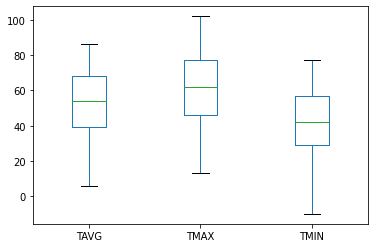

In [70]:
# Create a box plot of the temperature columns
weather[['TAVG', 'TMAX', 'TMIN']].plot(kind='box')
plt.show()

In [71]:
# Create a 'TDIFF' column that represents temperature difference
weather['TDIFF'] = weather.TMAX - weather.TMIN

In [72]:
# Describe the 'TDIFF' column
weather.TDIFF.describe()

count    7994.000000
mean       19.149237
std         7.009716
min       -25.000000
25%        14.000000
50%        19.000000
75%        24.000000
max        48.000000
Name: TDIFF, dtype: float64

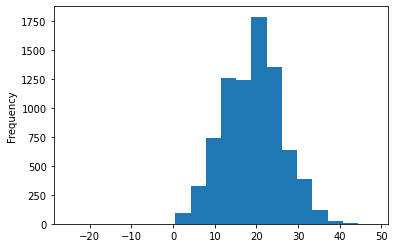

In [73]:
# Create a histogram with 20 bins to visualize 'TDIFF'
weather.TDIFF.plot(kind='hist', bins=20)
plt.show()

In [74]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:, 'WT01':'WT22']

In [75]:
# Calculate the sum of each row in 'WT'
weather['bad_condition'] = WT.sum(axis='columns')

In [76]:
# Replace missing values in 'bad_conditions' with '0'
weather.bad_condition.fillna(0).astype('int')

0       0
1       0
2       0
3       0
4       0
       ..
8017    1
8018    0
8019    3
8020    2
8021    1
Name: bad_condition, Length: 8022, dtype: int64

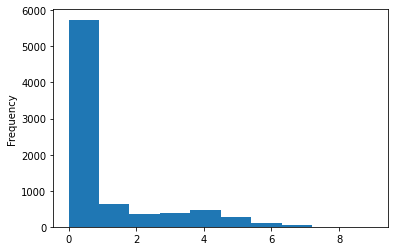

In [77]:
# Create a histogram to visualize 'bad_conditions'
weather.bad_condition.plot(kind='hist')
plt.show()

In [78]:
# Count the unique values in 'bad_conditions' and sort the index
weather.bad_condition.value_counts().sort_index()

0.0    5738
1.0     628
2.0     368
3.0     380
4.0     476
5.0     282
6.0     101
7.0      41
8.0       4
9.0       4
Name: bad_condition, dtype: int64

In [79]:
# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

In [80]:
weather['rating'] = weather.bad_condition.map(mapping)

In [81]:
# Count the unique values in 'rating'
weather.rating.value_counts()

good     5738
bad      1852
worse     432
Name: rating, dtype: int64

In [82]:
# Create a list of weather ratings in logical order
cats = ['good', 'bad', 'worse']

In [83]:
# Change the data type of 'rating' to category
weather['rating'] = pd.Categorical(weather.rating, ordered=True, categories=cats)

In [84]:
# Examine the head of 'rating'
weather.rating.head()

0    good
1    good
2    good
3    good
4    good
Name: rating, dtype: category
Categories (3, object): [good < bad < worse]

In [85]:
# Reset the index of 'ri': move the stop_datetime index to a column since the index will be lost during the merge
ri.reset_index(inplace=True)

In [86]:
# Examine the head of 'ri'
ri.head()

,stop_datetime,id,stop_date,stop_time,location_raw,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,NaN,NaN,600,M,1985.0,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,NaN,NaN,500,M,1987.0,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2,2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,NaN,NaN,500,M,1986.0,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
3,2005-01-06 01:30:00,RI-2005-00005,2005-01-06,01:30,Zone X4,NaN,NaN,500,M,1978.0,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,2005-01-12 08:05:00,RI-2005-00006,2005-01-12,08:05,Zone X1,NaN,NaN,0,M,1973.0,...,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1


In [89]:
# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE', 'rating']]

In [90]:
# Examine the head of 'weather_rating'
weather_rating.head()

,DATE,rating
0,2005-01-01,good
1,2005-01-02,good
2,2005-01-03,good
3,2005-01-04,good
4,2005-01-05,good


In [91]:
# Merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

In [92]:
# Examine the shape of 'ri_weather'
ri_weather.shape

(959952, 27)

In [93]:
ri_weather.columns

Index(['stop_datetime', 'id', 'stop_date', 'stop_time', 'location_raw',
       'county_fips', 'fine_grained_location', 'police_department',
       'driver_gender', 'driver_age_raw', 'driver_age', 'driver_race_raw',
       'driver_race', 'violation_raw', 'violation', 'search_conducted',
       'search_type_raw', 'search_type', 'contraband_found', 'stop_outcome',
       'is_arrested', 'stop_duration', 'out_of_state', 'drugs_related_stop',
       'district', 'DATE', 'rating'],
      dtype='object')

In [94]:
# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_datetime', inplace=True)

In [95]:

#-------------------------------------------
# (4.4) Dose weather affect the arrest rate?
#-------------------------------------------
"""
Do police officers arrest drivers more often when the weather is bad? Find out below!

First, you'll calculate the overall arrest rate.
Then, you'll calculate the arrest rate for each of the weather ratings you previously assigned.
Finally, you'll add violation type as a second factor in the analysis, 
to see if that accounts for any differences in the arrest rate.
"""

"\nDo police officers arrest drivers more often when the weather is bad? Find out below!\n\nFirst, you'll calculate the overall arrest rate.\nThen, you'll calculate the arrest rate for each of the weather ratings you previously assigned.\nFinally, you'll add violation type as a second factor in the analysis, \nto see if that accounts for any differences in the arrest rate.\n"

In [96]:
# Calculate the overall arrest rate
ri_weather.is_arrested.mean()

0.0345715202426788

In [97]:
# Calculate the arrest rate for each 'rating'
ri_weather.groupby('rating').is_arrested.mean()

rating
good     0.034080
bad      0.035226
worse    0.039360
Name: is_arrested, dtype: float64

In [98]:
# Calculate the arrest rate for each 'violation' and 'rating'
ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

violation            rating
Equipment            good      0.059125
                     bad       0.059581
                     worse     0.094373
Moving violation     good      0.056805
                     bad       0.058081
                     worse     0.062249
Other                good      0.080682
                     bad       0.084950
                     worse     0.058704
Registration/plates  good      0.083238
                     bad       0.092634
                     worse     0.098673
Seat belt            good      0.026339
                     bad       0.028795
                     worse     0.000000
Speeding             good      0.013494
                     bad       0.013348
                     worse     0.016600
Name: is_arrested, dtype: float64

In [ ]:
"""The arrest rate increases as the weather gets worse, and 
that trend persists across many of the violation types."""

In [99]:
# Save the output of the groupby operation from the last exercise
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

In [100]:
# Print the 'arrest_rate' Series
print(arrest_rate)

violation            rating
Equipment            good      0.059125
                     bad       0.059581
                     worse     0.094373
Moving violation     good      0.056805
                     bad       0.058081
                     worse     0.062249
Other                good      0.080682
                     bad       0.084950
                     worse     0.058704
Registration/plates  good      0.083238
                     bad       0.092634
                     worse     0.098673
Seat belt            good      0.026339
                     bad       0.028795
                     worse     0.000000
Speeding             good      0.013494
                     bad       0.013348
                     worse     0.016600
Name: is_arrested, dtype: float64


In [103]:
# Print the arrest rate for moving violations in bad weather
print(arrest_rate.loc['Moving violation', 'bad'])

0.0580814717477004


In [104]:
# Print the arrest rates for speeding violations in all three weather conditions
print(arrest_rate.loc['Speeding'])

rating
good     0.013494
bad      0.013348
worse    0.016600
Name: is_arrested, dtype: float64


In [108]:
# Unstack the 'arrest_rate' Series into a DataFrame
arrest_rate_table = arrest_rate.unstack()

In [106]:
arrest_rate.dtype

dtype('float64')

In [107]:
type(arrest_rate)

pandas.core.series.Series

In [109]:
type(arrest_rate_table)

pandas.core.frame.DataFrame

In [111]:
# Create the same DataFrame using a pivot table
arrest_rate_table_pivot = ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested')

In [112]:
type(arrest_rate_table_pivot)

pandas.core.frame.DataFrame

In [113]:
print(arrest_rate_table_pivot)

rating                   good       bad     worse
violation                                        
Equipment            0.059125  0.059581  0.094373
Moving violation     0.056805  0.058081  0.062249
Other                0.080682  0.084950  0.058704
Registration/plates  0.083238  0.092634  0.098673
Seat belt            0.026339  0.028795  0.000000
Speeding             0.013494  0.013348  0.016600
